'Hardcoded Equations [Velocity  & Displacement]'

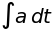

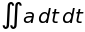

Velocity(m), Height(m), Angle(deg)? 100 10 45


'Derived ... Velocity Equations [vx, vy]:'

'Derived ... Displacement Equations [sx, sy]'

'Time to max height (sec)'

'Max height (m):'

'Range (m):'

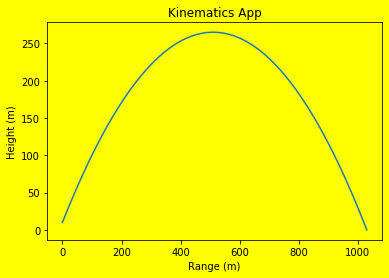

In [2]:
#Homework 4 KEY barebones
from numpy import radians, linspace
from IPython.display import display
from sympy import *
%matplotlib inline
import matplotlib.pyplot as plt
init_printing(use_latex=True)

g = -9.8
t,  a, v, v0, vx, vx0, vy, vy0, vt = symbols ('t, a, v, v_0, v_x, v_x0, v_y, v_y0, v_t')
s0, sx, sx0, sy, sy0, st = symbols ('s_0, s_x, s_x0, s_y, s_y0, s_t')

vt = Integral(a, t)    # int(a*dt)
st = Integral (vt, t )  # int((at + v0)dt)
display('Hardcoded Equations [Velocity  & Displacement]', vt, st )

vt = integrate(a, t) + v0     # v0 is initia velocity
st = integrate (vt, t ) + s0  # s0 is initial displacement

#Input the three quantities
Velocity, Height, Angle = [int(next) for next in input("Velocity(m), Height(m), Angle(deg)? ").split()]
#Find X and Y initial velocity components
initialXvelocity = Velocity * cos(radians(Angle))
initialYvelocity = Velocity * sin(radians(Angle))

#Derive X & Y component equations, for velocity & displacement. Display them 
vx = vt.subs([(a, 0),  (v0, vx0)]  )              #velocity x component
vy = vt.subs([(a, g), (v0, vy0)]  )               #velocity y component
sx = st.subs([(a, 0), (s0, sx0),  (v0, vx0)]  )   #displacement x component
sy = st.subs([(a, g), (s0, sy0),   (v0, vy0)]  )  #displacement y component
display('Derived ... Velocity Equations [vx, vy]:' , vx, vy  )
display('Derived ... Displacement Equations [sx, sy]' ,  sx, sy)

#Time to max height: Use Y velocity equation [plug in 'initial Y velocity' & 't = 0'] to find time to max height
timeToMaxHeight = solve(vy.subs([(vy0, initialYvelocity)]), t)[0]
display('Time to max height (sec)', timeToMaxHeight)

#Max Height: Use Y velocity equation [plug in 'initial Y velocity' & 'time to max height'] to find max height
max_height = sy.subs([(sy0, Height), (t, timeToMaxHeight), (vy0, initialYvelocity)] )
display('Max height (m):', max_height)

#Time to hit ground: Use (sy) Y displacement equation [plug in 'y displacement = 0' ] to find time to ground
timeToHitGround0 = solve(sy.subs([(sy0, Height), (vy0, initialYvelocity)] ), t)
#Launch from ground can have an initial time to ground of t =0 ... if so do NOT use it  
timeToHitGround0 = timeToHitGround0[1] if timeToHitGround0[1] else timeToHitGround0[0]

#Range: Use (sx) X displacement equation [plug in 'initial X velocity' & 'time to ground'] to find Range
Range = sx.subs([(sx0, 0),  (t, timeToHitGround0),  (vx0, initialXvelocity)]   )
display('Range (m):', Range)

#Plot: Use 'dispalcement equations' to compute X & Y displacement for time instances [0 ... 'time to hit ground'] 
x, y = [], []
timeInstances = linspace(0.0, float(timeToHitGround0), num=123)
for thisTimeInstant in timeInstances:
    x.append(sx.subs([(sx0, 0), (t, thisTimeInstant),  (vx0, initialXvelocity)]))
    y.append(sy.subs([(sy0, Height),  (t, thisTimeInstant),  (vy0, initialYvelocity)]))

fig, ax = plt.subplots()
fig.patch.set_facecolor('yellow')
ax.patch.set_facecolor('yellow')
ax.set_xlabel('Range (m)')
ax.set_ylabel('Height (m)')
ax.set_title('Kinematics App')
ax.plot(x,  y)
plt.show()